<a href="https://colab.research.google.com/github/mietekdom/Nepal_Solar-Radiation-Measurments/blob/main/Nepal_solar_radiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Import data**

In [35]:
df = pd.read_csv('https://energydata.info/dataset/ead8d2fa-de59-48d3-8693-817b36b3a470/resource/ef17f691-0256-497d-a5ee-3c6a334ae1e2/download/solar-measurements_nepal_dharan_wb-esmap_qc.csv',
                 index_col=0, parse_dates=True)
df.head()


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.



,ghi,dni,dhi,air_temperature,relative_humidity,wind_speed,wind_speed_of_gust,wind_from_direction_st_dev,wind_from_direction,barometric_pressure,rain,sensor_cleaning,comments
time,,,,,,,,,,,,,
2018-07-01 00:01:00,0.0,NaN,NaN,26.7,95.0,2.5,3.2,8.2,27.9,965.3,0.0,0,Tracking device misaligned; no DNI/DHI measure...
2018-07-01 00:02:00,0.0,NaN,NaN,26.7,94.5,2.3,2.9,7.5,24.3,965.3,0.0,0,Tracking device misaligned; no DNI/DHI measure...
2018-07-01 00:03:00,0.0,NaN,NaN,26.7,94.3,2.4,3.2,9.0,20.7,965.3,0.0,0,Tracking device misaligned; no DNI/DHI measure...
2018-07-01 00:04:00,0.0,NaN,NaN,26.7,94.3,2.5,2.9,8.9,15.6,965.2,0.0,0,Tracking device misaligned; no DNI/DHI measure...
2018-07-01 00:05:00,0.0,NaN,NaN,26.8,94.2,2.1,2.9,7.4,15.4,965.2,0.0,0,Tracking device misaligned; no DNI/DHI measure...


**Rain analysis**

In [36]:
df_time = df[['rain']]
df_time.head

<bound method NDFrame.head of                      rain
time                     
2018-07-01 00:01:00   0.0
2018-07-01 00:02:00   0.0
2018-07-01 00:03:00   0.0
2018-07-01 00:04:00   0.0
2018-07-01 00:05:00   0.0
...                   ...
2020-04-30 23:56:00   0.0
2020-04-30 23:57:00   0.0
2020-04-30 23:58:00   0.0
2020-04-30 23:59:00   0.0
2020-05-01 00:00:00   0.0

[964800 rows x 1 columns]>

In [37]:
rain_2018 = df_time.loc['2018']
rain_2019 = df_time.loc['2019']
rain_2020 = df_time.loc['2020']
rain_2019.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2019-01-01 00:00:00 to 2019-12-31 23:59:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rain    525600 non-null  float64
dtypes: float64(1)
memory usage: 8.0 MB


In [38]:
rain_2018_month = rain_2018.resample('M').mean()
rain_2019_month = rain_2019.resample('M').mean()
rain_2020_month = rain_2020.resample('M').mean()
rain_2019_month

,rain
time,
2019-01-31,0.000002
2019-02-28,0.001873
2019-03-31,0.000842
2019-04-30,0.002317
2019-05-31,0.001570
2019-06-30,0.003606
2019-07-31,0.015898
2019-08-31,0.001086
2019-09-30,0.000002


**Change column name**

In [39]:
rain_2018_month.columns = ['rain_2018']
rain_2019_month.columns = ['rain_2019']
rain_2020_month.columns = ['rain_2020']
rain_2019_month

,rain_2019
time,
2019-01-31,0.000002
2019-02-28,0.001873
2019-03-31,0.000842
2019-04-30,0.002317
2019-05-31,0.001570
2019-06-30,0.003606
2019-07-31,0.015898
2019-08-31,0.001086
2019-09-30,0.000002


In [40]:
rain_all_row = pd.concat(objs=[rain_2018_month, rain_2019_month, rain_2020_month], axis=1)
rain_all_row

,rain_2018,rain_2019,rain_2020
time,,,
2018-07-31,0.008454,NaN,NaN
2018-08-31,0.003141,NaN,NaN
2018-09-30,0.005824,NaN,NaN
2018-10-31,0.000739,NaN,NaN
2018-11-30,0.000000,NaN,NaN
2018-12-31,0.000004,NaN,NaN
2019-01-31,NaN,0.000002,NaN
2019-02-28,NaN,0.001873,NaN
2019-03-31,NaN,0.000842,NaN


In [41]:
month = ['July','August', 'September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May']
colums = []
rain_all_row['month'] = month
rain_all_row

,rain_2018,rain_2019,rain_2020,month
time,,,,
2018-07-31,0.008454,NaN,NaN,July
2018-08-31,0.003141,NaN,NaN,August
2018-09-30,0.005824,NaN,NaN,September
2018-10-31,0.000739,NaN,NaN,October
2018-11-30,0.000000,NaN,NaN,November
2018-12-31,0.000004,NaN,NaN,December
2019-01-31,NaN,0.000002,NaN,January
2019-02-28,NaN,0.001873,NaN,February
2019-03-31,NaN,0.000842,NaN,March


In [42]:
rain_all = rain_all_row.reset_index()
rain_2018_2020 = rain_all.iloc[:, [1,2,3,4]]

rain_2018_2020

,rain_2018,rain_2019,rain_2020,month
0,0.008454,NaN,NaN,July
1,0.003141,NaN,NaN,August
2,0.005824,NaN,NaN,September
3,0.000739,NaN,NaN,October
4,0.000000,NaN,NaN,November
5,0.000004,NaN,NaN,December
6,NaN,0.000002,NaN,January
7,NaN,0.001873,NaN,February
8,NaN,0.000842,NaN,March
9,NaN,0.002317,NaN,April


In [54]:
df_2018 = rain_2018_2020.iloc[0 : 6, [0, 3]]
df_2018.set_index('month', inplace=True)

df_2019 = rain_2018_2020.iloc[6 : 18, [1, 3]]
df_2019.set_index('month', inplace=True)

df_2020 = rain_2018_2020.iloc[18 : 23, [2, 3]]
df_2020.set_index('month', inplace=True)

df_2020.head(12)

,rain_2020
month,
January,0.000305
February,0.000867
March,0.001167
April,0.001410
May,0.000000


In [55]:
df_all = pd.concat(objs=[df_2018, df_2019, df_2020], axis=1)
df_all

,rain_2018,rain_2019,rain_2020
July,0.008454,0.015898,NaN
August,0.003141,0.001086,NaN
September,0.005824,0.000002,NaN
October,0.000739,0.000013,NaN
November,0.000000,0.000000,NaN
December,0.000004,0.000054,NaN
January,NaN,0.000002,0.000305
February,NaN,0.001873,0.000867
March,NaN,0.000842,0.001167
April,NaN,0.002317,0.001410


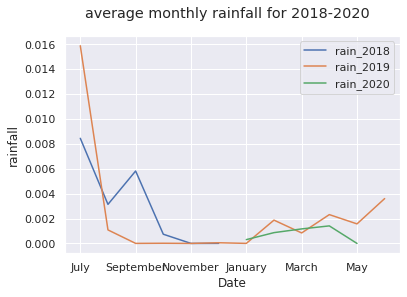

In [62]:
_ = df_all.plot()
_ = plt.suptitle('average monthly rainfall for 2018-2020')
_ = plt.xlabel('Date')
_ = plt.ylabel('rainfall')